In [1]:
import seaborn as sns
import numpy as np
import math

In [2]:
def gva_exp():
    _lambda = 0.00157
    U = np.random.random_sample()
    return -1 * (np.log(1-U)/_lambda)

In [3]:
def U():
    return np.random.randint(1, 5)

In [4]:
k = 50

In [5]:
matriz = np.zeros((k,5))

In [6]:
t_llegada = 0
t_sistema = 0
for i in range(k):
    t_entre_user = gva_exp()      
    t_llegada = t_llegada + t_entre_user
    t_inicio_servicio = t_llegada + U()
    t_servicio = t_inicio_servicio + np.random.poisson(5)
    t_sistema = t_sistema + (t_servicio - t_inicio_servicio)
    matriz[i,0] = t_entre_user
    matriz[i,1] = t_llegada
    matriz[i,2] = t_inicio_servicio
    matriz[i,3] = t_servicio
    matriz[i,4] = t_sistema
    print("TEU %s, TLL %s, TIS %s, TSS %s, TS %s"%(t_entre_user,t_llegada,t_inicio_servicio, t_servicio, t_sistema))

TEU 211.39098038750538, TLL 211.39098038750538, TIS 215.39098038750538, TSS 219.39098038750538, TS 4.0
TEU 378.6664865527926, TLL 590.057466940298, TIS 594.057466940298, TSS 601.057466940298, TS 11.0
TEU 23.18791946287449, TLL 613.2453864031725, TIS 614.2453864031725, TSS 619.2453864031725, TS 16.0
TEU 1094.1261727672927, TLL 1707.3715591704652, TIS 1710.3715591704652, TSS 1714.3715591704652, TS 20.0
TEU 2377.5753580285023, TLL 4084.9469171989676, TIS 4087.9469171989676, TSS 4092.9469171989676, TS 25.0
TEU 1910.7995502111432, TLL 5995.746467410111, TIS 5997.746467410111, TSS 6002.746467410111, TS 30.0
TEU 974.5248338893414, TLL 6970.271301299453, TIS 6974.271301299453, TSS 6976.271301299453, TS 32.0
TEU 482.3161319584368, TLL 7452.58743325789, TIS 7456.58743325789, TSS 7462.58743325789, TS 38.0
TEU 40.036867905022945, TLL 7492.624301162912, TIS 7495.624301162912, TSS 7501.624301162912, TS 44.0
TEU 756.964129112316, TLL 8249.588430275227, TIS 8253.588430275227, TSS 8257.588430275227, TS

In [7]:
sns.lineplot(x=range(k), y=matriz[:,4])

In [8]:
matriz[:,4].mean()

137.16

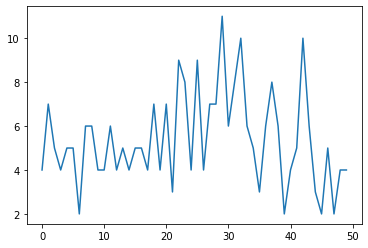

In [9]:
sns.lineplot(x=range(k), y=matriz[:,3]-matriz[:,2])

In [10]:
T = matriz[:,3]-matriz[:,2]

In [11]:
def freq_abs(x):
    _min = int(x.min())
    _max = int(x.max())
    m = np.zeros(((_max+1),4))
    for i in range(_min, (_max+1)):
        c = 0
        for j in range(k):
            if i == x[j]:
                c = c + 1
        m[i,0] = float(i)
        m[i,1] = c
    return m

In [12]:
def freq_rel(x):
    total = float(x[:,1].sum())
    _max = int(x[:,0].max())
    fr = 0
    for i in range(_max+1):
        fr = fr + x[i,1]
        x[i, 2] = float(fr)
        x[i, 3] = float(x[i, 2]/total)
        print(x[i,2])
    return x

In [13]:
S = freq_abs(T)

In [14]:
cl = freq_rel(S)

0.0
0.0
4.0
7.0
20.0
29.0
37.0
42.0
45.0
47.0
49.0
50.0


In [15]:
cl

array([[ 0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ],
       [ 2.  ,  4.  ,  4.  ,  0.08],
       [ 3.  ,  3.  ,  7.  ,  0.14],
       [ 4.  , 13.  , 20.  ,  0.4 ],
       [ 5.  ,  9.  , 29.  ,  0.58],
       [ 6.  ,  8.  , 37.  ,  0.74],
       [ 7.  ,  5.  , 42.  ,  0.84],
       [ 8.  ,  3.  , 45.  ,  0.9 ],
       [ 9.  ,  2.  , 47.  ,  0.94],
       [10.  ,  2.  , 49.  ,  0.98],
       [11.  ,  1.  , 50.  ,  1.  ]])

In [16]:
sns.boxplot(data=S[:,1])